# Visual Stimulation design and procedures

In [ ]:
import sys
sys.path.append('../src')
from physion.utils import plot_tools as pt
import matplotlib.pylab as plt
import numpy as np

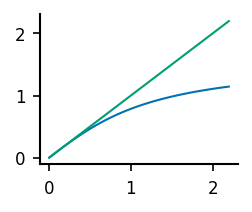

In [51]:
x = np.linspace(0, .7*np.pi)
plt.plot(x, np.arctan(x))
plt.plot(x, x)

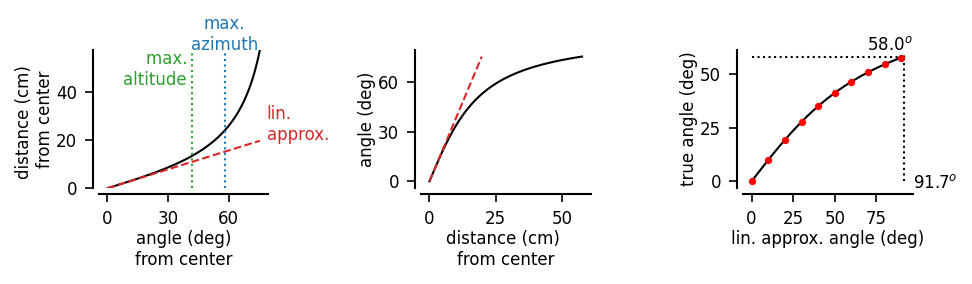

In [54]:
def cm_to_angle(distance,
                distance_from_eye=15.):
    # distance_from_eye in cm
    return 180./np.pi*np.arctan(distance/distance_from_eye)

def cm_to_angle_lin(distance, distance_from_eye=15.):
    # the derivative of arctan in 0 is 1
    return distance/distance_from_eye*180./np.pi
    #return cm_to_angle(1, distance_from_eye=distance_from_eye)*distance

def angle_to_cm(angle,
                distance_from_eye=15.):
    # distance_from_eye in cm
    return distance_from_eye*np.tan(np.pi*angle/180.)

screen_width = 48. # cm
screen_height = 27. # cm
distance_from_eye = 15. # cm

max_height = cm_to_angle(screen_height/2.)
max_width = cm_to_angle(screen_width/2.)

angles = np.linspace(0, 1.3*max_width, 100) #
positions = angle_to_cm(angles, distance_from_eye=distance_from_eye)

fig, [ax, ax2, ax3] = plt.subplots(1, 3, figsize=(7,1.2))
plt.subplots_adjust(wspace=0.9)
ax.plot(angles, positions, color='k')
pt.plot(angles, angle_to_cm(1)*angles, ls='--', ax=ax, no_set=True, color='tab:red')
ax.annotate('lin.\napprox.', (0.99,0.35), color='tab:red', xycoords='axes fraction')

ax2.plot(positions, angles, color='k')
pt.plot(angle_to_cm(1)*angles, angles, ls='--', ax=ax2, no_set=True, color='tab:red')

ax.plot(np.ones(2)*max_height, [0,positions.max()], ':', color='tab:green', lw=1)
ax.annotate('max. \naltitude ', (max_height,positions.max()), color='tab:green', xycoords='data', va='top', ha='right')

ax.plot(np.ones(2)*max_width, [0,.98*positions.max()], ':', color='tab:blue', lw=1)
ax.annotate('max.\nazimuth', (max_width, positions.max()), color='tab:blue', xycoords='data', ha='center')

pt.set_plot(ax, 
            ylabel='distance (cm) \nfrom center',
            xlabel='angle (deg)\nfrom center',
            ylim=[0,positions.max()])
pt.set_plot(ax2, 
            xlabel='distance (cm) \nfrom center',
            ylabel='angle (deg)')

x = np.linspace(0, screen_width/2.)
ax3.plot(cm_to_angle_lin(x), cm_to_angle(x), 'k-')
ax3.plot(np.ones(2)*cm_to_angle_lin(x[-1]), [0,cm_to_angle(x[-1])], 'k:', lw=1)
ax3.plot([0,cm_to_angle_lin(x[-1])], np.ones(2)*cm_to_angle(x[-1]), 'k:', lw=1)
ax3.annotate('%.1f$^{o}$' % cm_to_angle_lin(x[-1]),
             (1, 0), xycoords='axes fraction')
ax3.annotate('%.1f$^{o}$' % cm_to_angle(x[-1]),
             (1, 1), xycoords='axes fraction', ha='right')

def angle_lin_to_true_angle(angle):
    return 180./np.pi*np.arctan(angle/180.*np.pi)

x = np.linspace(0, 90, 10)
ax3.plot(x, angle_lin_to_true_angle(x), 'ro')

pt.set_plot(ax3, 
            xlabel='lin. approx. angle (deg)',
            ylabel='true angle (deg)',
            num_xticks=5)

#ge.save_on_desktop(fig)

Text(0.5, 1.0, 'screen coordinates')

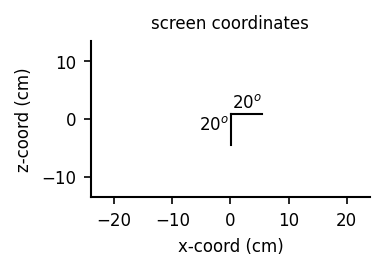

In [16]:
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(screen_width/20.,screen_height/20.))
pt.draw_bar_scales(ax, Ybar=angle_to_cm(20), Xbar=angle_to_cm(20), Xbar_label='20$^o$', Ybar_label='20$^o$')
ax.set_xlim(np.arange(-1,3,2)*screen_width/2.)
ax.set_ylim(np.arange(-1,3,2)*screen_height/2.)
ax.set_xlabel('x-coord (cm)')
ax.set_ylabel('z-coord (cm)')
ax.set_title('screen coordinates')
#ge.save_on_desktop(fig)

In [17]:
print('visual field covered:')
print('azimuth:', cm_to_angle(screen_width/2.))
print('altitude:', cm_to_angle(screen_height/2.))

visual field covered:
azimuth: 57.9946167919165
altitude: 41.98721249581666


## stim design

In [39]:
# start from a simple protocol to load all required data
import json, os
with open(os.path.join('..', 'src', 'physion', 'acquisition', 'protocols', 'demo', 'uniform-bg.json')) as j:
    protocol = json.load(j)
    
from physion.visual_stim.build import build_stim #, init_bg_image
from physion.visual_stim.main import init_bg_image
protocol['no-window'] = True
stim = build_stim(protocol)

0.1432391503683066


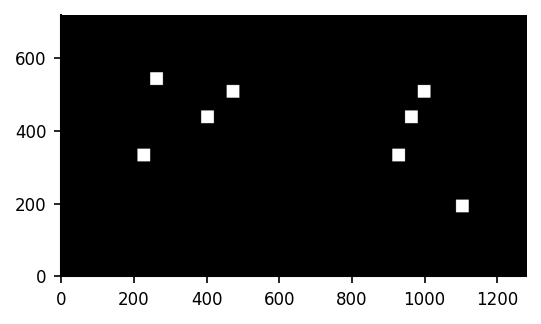

In [51]:
def compute_new_image_with_dots(self, index, dot_size, Ndots,
                                away_from_edges_factor=4):
    dot_size_pix = int(np.round(self.angle_to_pix(dot_size),0))
    Nx = int(self.x.shape[0]/dot_size_pix)
    Nz = int(self.x.shape[1]/dot_size_pix)
    dots = []
    img = init_bg_image(self, index)
    for n in range(Ndots):
        ix, iz = (np.random.choice(np.arange(away_from_edges_factor, Nx-away_from_edges_factor),1)[0],
                  np.random.choice(range(away_from_edges_factor,Nz-away_from_edges_factor),1)[0])
        img[dot_size_pix*ix:dot_size_pix*(ix+1),
            dot_size_pix*iz:dot_size_pix*(iz+1)] = 1
    return img
        
img = compute_new_image_with_dots(stim, 0, 5, 8)
fig, ax = plt.subplots(1, figsize=(4,4))
ax.imshow(img.T, origin='lower', cmap=plt.cm.gray)
#ax.axis('off')

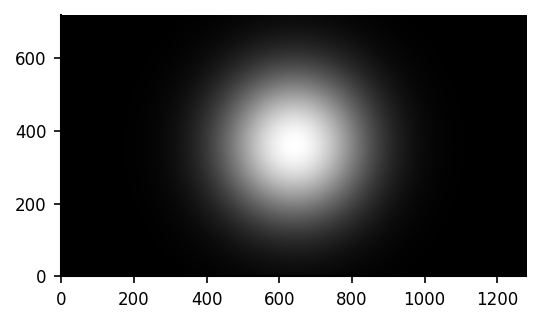

In [48]:
fig, ax = plt.subplots(1, figsize=(4,4))
radius = 20
img = init_bg_image(stim, 0)
img += np.exp(-(stim.x**2+stim.z**2)/2/radius**2)
ax.imshow(img.T, origin='lower', cmap=plt.cm.gray)
#ax.axis('off')

## Drawing stimulus for figures

In [ ]:
# start from a simple protocol to load all required data
import json, os
with open(os.path.join('..', 'src', 'physion', 'acquisition', 'protocols', 'demo', 'increasing-contrast.json')) as j:
    protocol = json.load(j)
    
from physion.visual_stim.stimuli import build_stim, init_bg_image
protocol['no-window'] = True
stim = build_stim(protocol)

fig, AX = ge.figure(axes=(10,1), wspace=0.5)
for i in range(10):
    AX[i].imshow(-stim.get_image(i).T, vmin=-1, vmax=1, cmap=ge.binary)
    AX[i].axis('off')
ge.save_on_desktop(fig, 'fig.svg')

In [ ]:
# start from a simple protocol to load all required data
import json, os
with open(os.path.join('..', 'physion', 'exp', 'protocols', 'demo', 'moving-dots.json')) as j:
    protocol = json.load(j)
    
from physion.visual_stim.stimuli import build_stim, init_bg_image
protocol['no-window'] = True
stim = build_stim(protocol)

fig, ax = ge.figure(axes=(1,1), wspace=0.5)
ax.imshow(-stim.get_image(1).T, vmin=-1, vmax=1, cmap=ge.binary)
ax.axis('off')
ge.save_on_desktop(fig, 'fig.svg')